In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

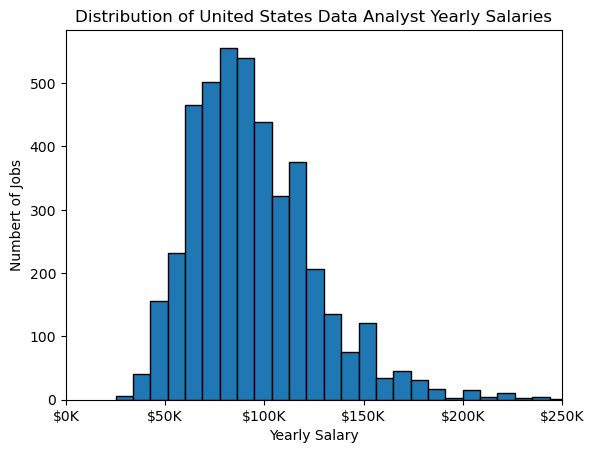

In [13]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000) #xlim es para decirle desde donde hasta donde, ylim funciona exactamente igual. Das un numero (0 y hasta donde lo quieres llevar. Puedes igualmente colocar desde 100 a 200 si necesitas algo aun mas especifico)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Numbert of Jobs')
plt.show()

(8.0, 140.0)

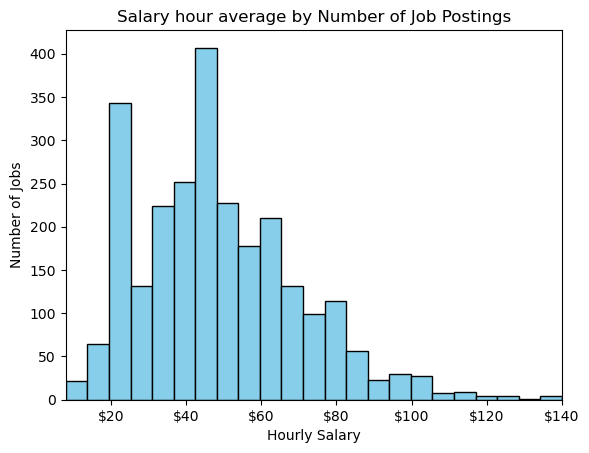

In [39]:
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()
df_DS = df_DS.dropna(subset=['salary_hour_avg'])

df_DS['salary_hour_avg'].plot(kind='hist', bins=40, color='skyblue', edgecolor='black')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}'))

plt.title('Salary hour average by Number of Job Postings')
plt.xlabel('Hourly Salary')
plt.ylabel('Number of Jobs')
plt.xlim(8, 140)

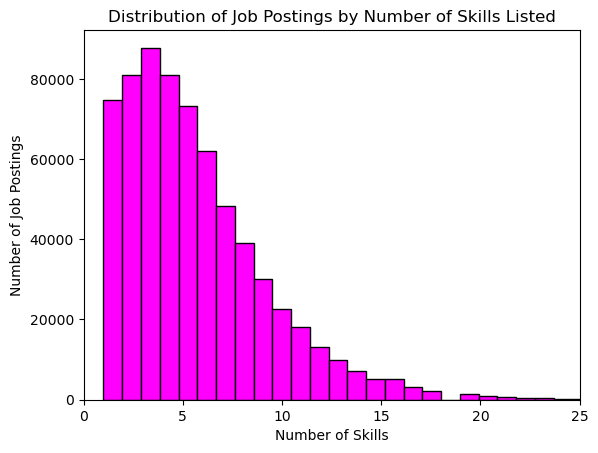

In [54]:
df_skills = df.dropna(subset=['job_skills']).copy()
df_skills['num_skills'] = df_skills['job_skills'].apply(len)

# Plot the histogram
df_skills['num_skills'].plot(kind='hist', bins=55, color='magenta', edgecolor='black')
plt.xlabel('Number of Skills')
plt.ylabel('Number of Job Postings')
plt.xlim(0, 25)
plt.title('Distribution of Job Postings by Number of Skills Listed')
plt.show()

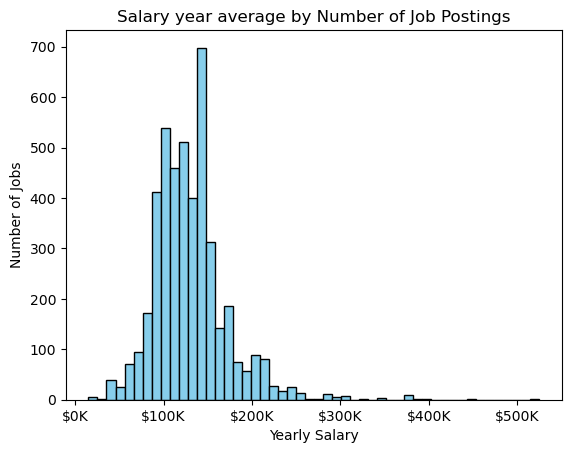

In [61]:
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE = df_DE.dropna(subset=['salary_year_avg'])

df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#plt.axvline(
#    color='blue'/'green', 
#    linestyle='Dashed',
#    label=eg., f'Mean: ${mean_salary:,.0f}'
#)
plt.title('Salary year average by Number of Job Postings')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()


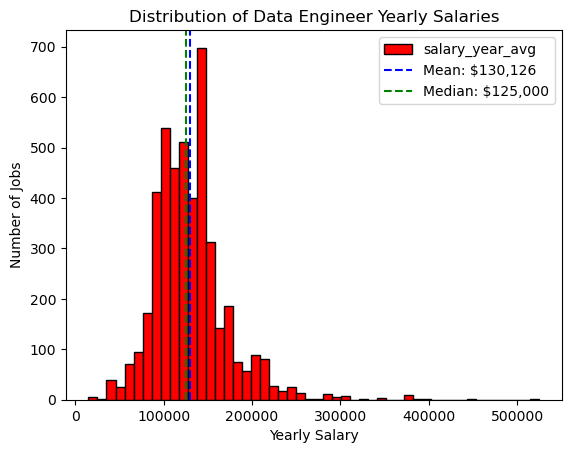

In [62]:
# Filter out the data
df_DE = df[df['job_title_short'] == 'Data Engineer'].copy()
df_DE = df_DE.dropna(subset=['salary_year_avg'])

# Get mean and median
mean_salary = df_DE['salary_year_avg'].mean()
median_salary = df_DE['salary_year_avg'].median()

# Plot the histogram
df_DE['salary_year_avg'].plot(kind='hist', bins=50, color='red', edgecolor='black')
plt.axvline(mean_salary, color='blue', linestyle='dashed', label=f'Mean: ${mean_salary:,.0f}')
plt.axvline(median_salary, color='green', linestyle='dashed', label=f'Median: ${median_salary:,.0f}')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.title('Distribution of Data Engineer Yearly Salaries')
plt.legend()
plt.show()

In [18]:
df_DA_US_CA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA_US_CA = df_DA_US_CA.dropna(subset=['salary_hour_avg'])

countries = ['United States', 'Canada']
united_states = [x for x in countries if 'United States' in x]
canada = [x for x in countries if 'Canada' in x]



In [ ]:
# Filter out data
countries = ['United States', 'Canada']
df_filtered = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_hour_avg'])

# Get list of DataFrames for each country
country_data = [df_filtered[df_filtered['job_country'] == country]['salary_hour_avg'] for country in countries]

# Plot chart
plt.boxplot(country_data, labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salaries for Data Analysts in the US and Canada')
plt.show()